# Background model building

Using nbextensions is nice: https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html
`conda install -c conda-forge jupyter_contrib_nbextensions`

In [2]:
import os
import sys
import numpy as np
import pathlib
import shutil
import importlib
from tqdm import tqdm
import copy

if os.getcwd().endswith('inspects'):
    os.chdir("..")
    print(f"CWD changed to: {os.getcwd()}.")

from inspects.utils import *
add_root_to_path(steps_up=2)

## Setup paths

In [20]:
import vendor
import cv2

input_root = pick_path([r"tests\input"])
office_dataset = pick_path([r"tests\input\office"])

## Prepare samples

In [15]:
import vendor.SEP.sep.loaders.images as loaders
import vendor.SEP.sep._commons.visuals as visuals
importlib.reload(loaders)

def annotatation_matcher(image_path : pathlib.Path):
    image_name = image_path.stem.replace("in", "gt") + ".png"
    return str(image_path.parent.parent / "masks" / image_name)

office_loader = loaders.ImagesLoader(data_root=os.path.join(office_dataset, "images"), 
                                     annotation_for_image_finder=annotatation_matcher,
                                     verbose=0)

print(office_loader)
print("Data count:", len(office_loader))

ImageLoader for: tests\input\office\images
Data count: 12


image_sample <class 'imageio.core.util.Array'>
Shape: (240, 360, 3) , Type: uint8 , Min-max: 0 255
gt_sample <class 'imageio.core.util.Array'>
Shape: (240, 360) , Type: uint8 , Min-max: 0 255


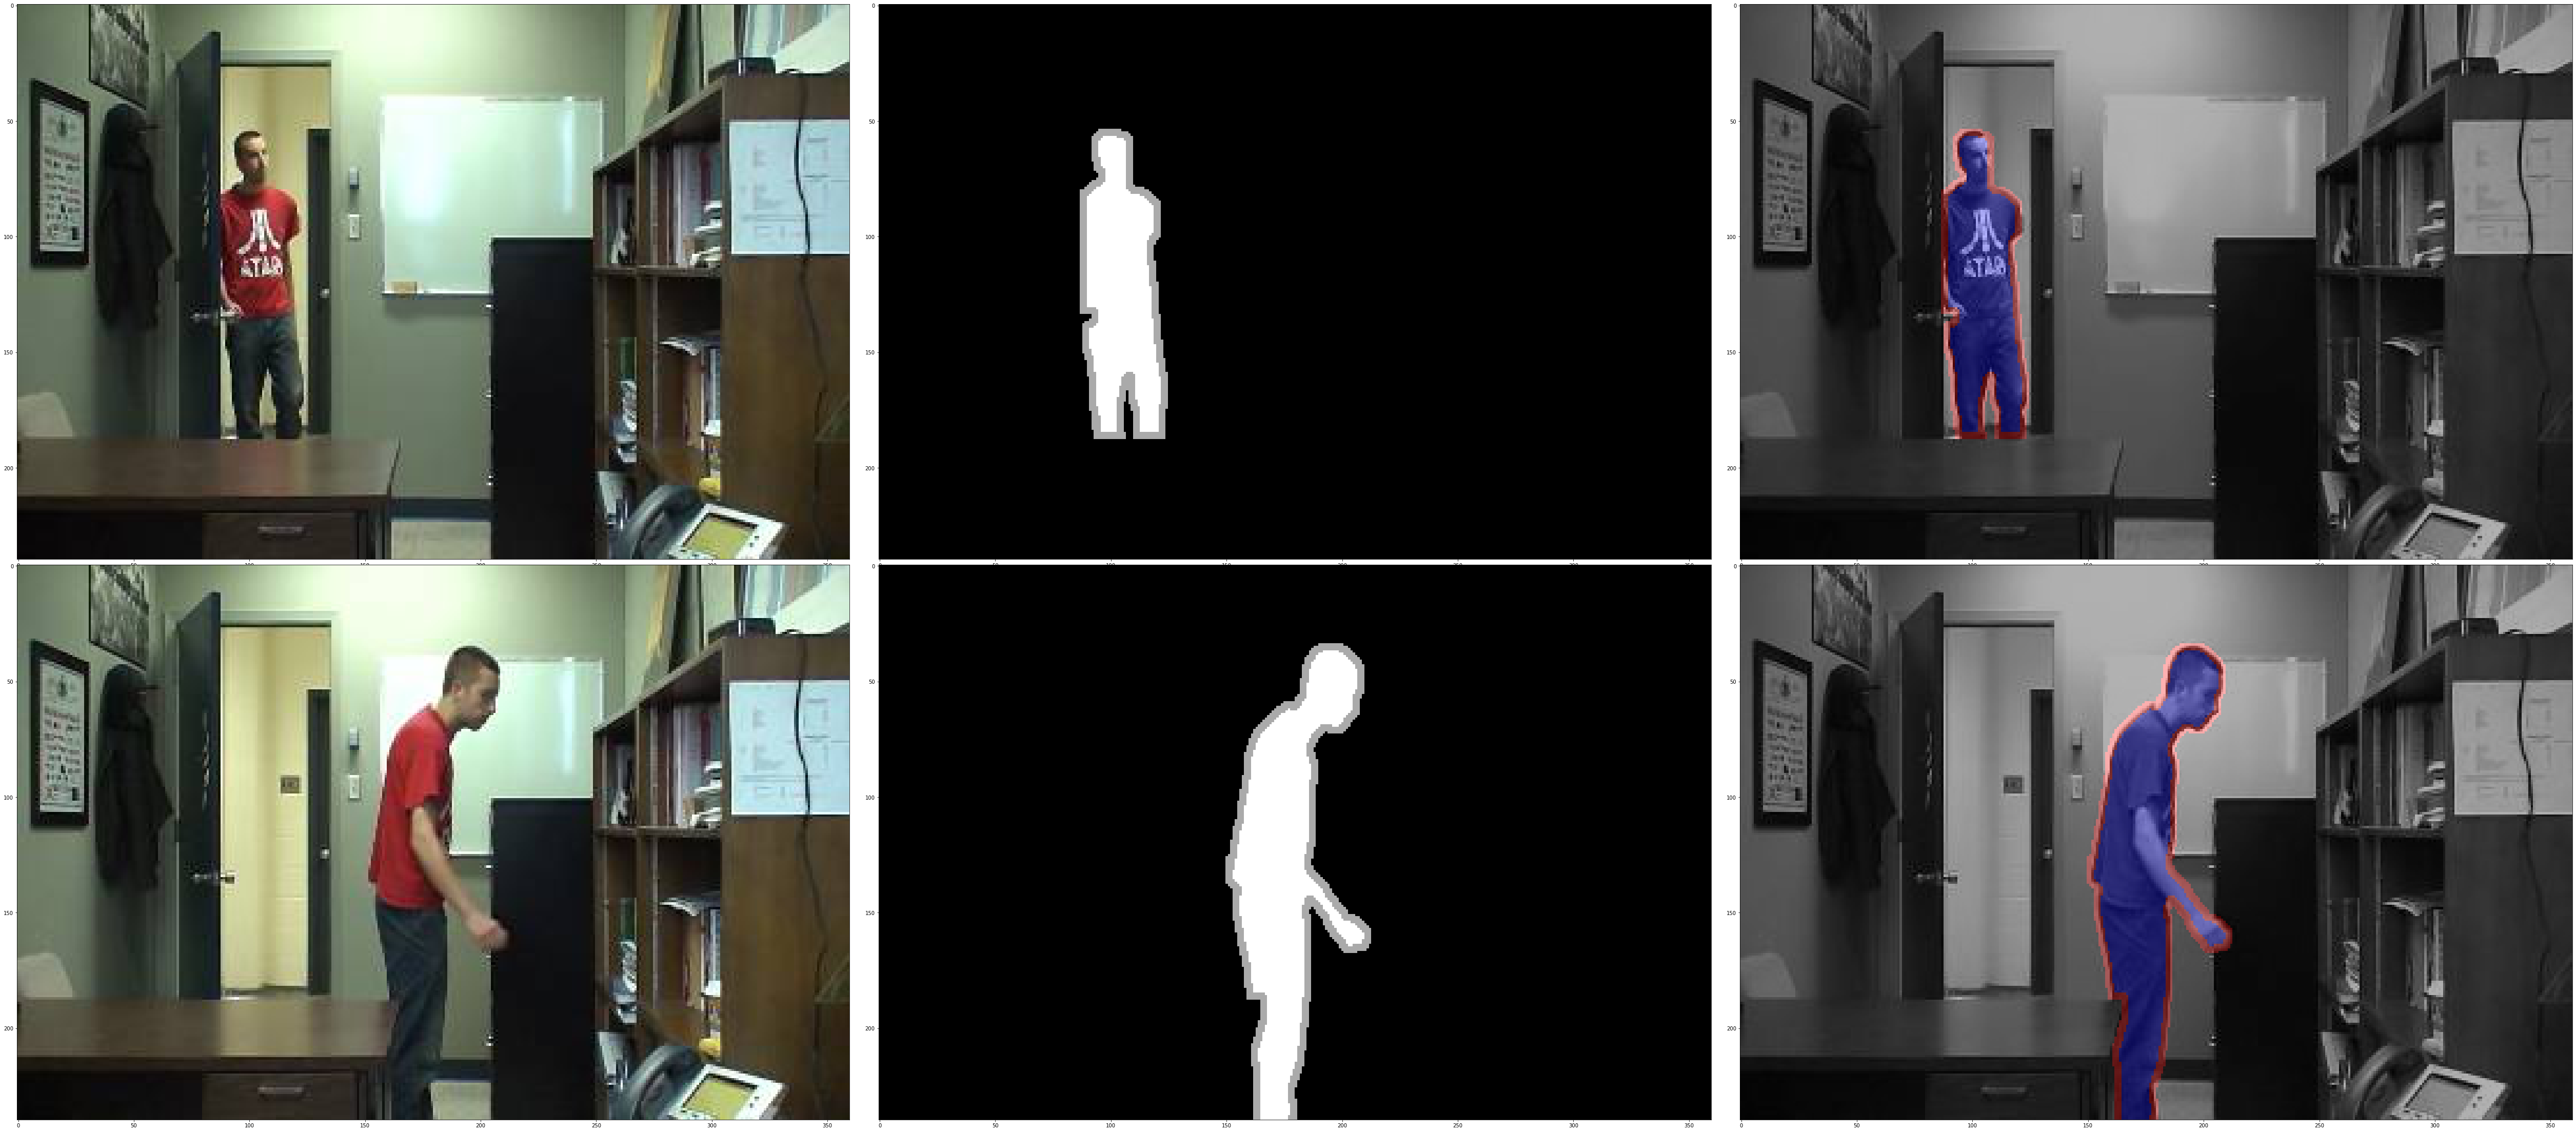

In [18]:
image_sample_1 = office_loader.load_image(0)
gt_sample_1 = office_loader.load_annotation(0)

image_sample_5 = office_loader.load_image(5)
gt_sample_5 = office_loader.load_annotation(5)

info(image_sample_1, "image_sample")
info(gt_sample_1, "gt_sample")

show_all(2, 3, image_sample_1, gt_sample_1, visuals.overlay(image_sample_1, gt_sample_1),
               image_sample_5, gt_sample_5, visuals.overlay(image_sample_5, gt_sample_5));

## Background difference

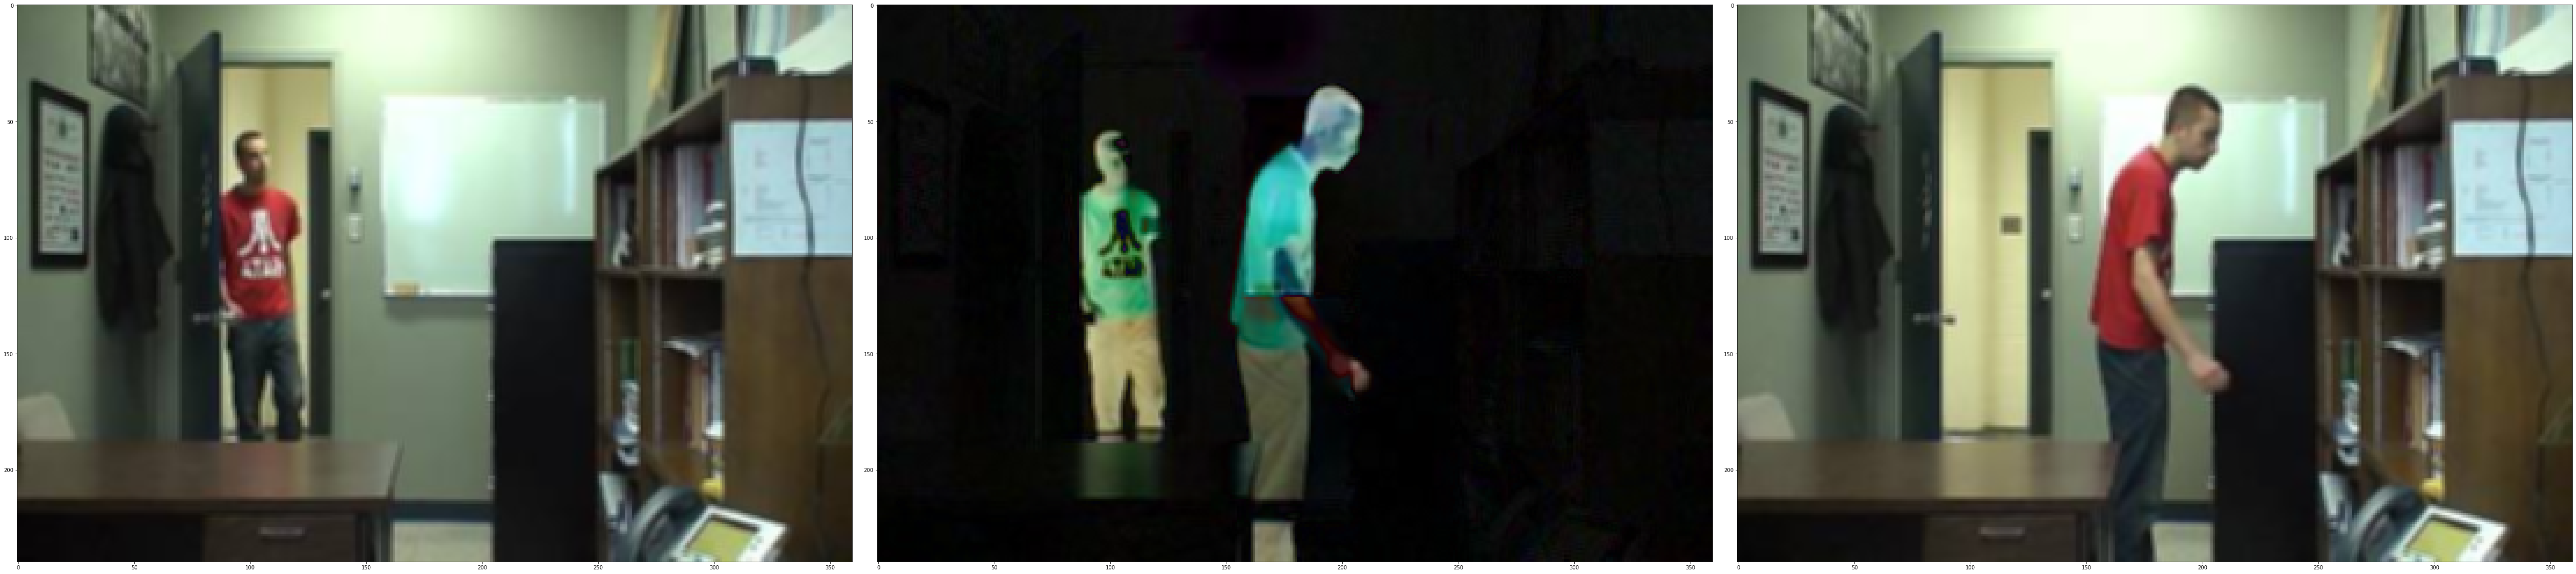

In [21]:
img1_blur = cv2.blur(image_sample_1, (3,3))
img5_blur = cv2.blur(image_sample_5, (3,3))
diff = cv2.absdiff(img1_blur, img5_blur)
show(img1_blur, diff, img5_blur)